In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [4]:
df = pd.read_csv("northern_states_yield.csv")

In [5]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arhar/Tur,1997,Kharif,Punjab,11000.0,8200,690.1,1046870.0,3410.0,0.766154
1,Bajra,1997,Kharif,Punjab,8000.0,8000,690.1,761360.0,2480.0,1.000000
2,Barley,1997,Rabi,Punjab,37000.0,111000,690.1,3521290.0,11470.0,2.995455
3,Cotton(lint),1997,Whole Year,Punjab,724000.0,937000,690.1,68903080.0,224440.0,1.324000
4,Gram,1997,Rabi,Punjab,13300.0,11000,690.1,1265761.0,4123.0,0.844615


### Checking for Null Values

In [10]:
print(df.isnull().sum())

df.bfill(inplace=True)

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


# 

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,3864.000000,3.864000e+03,3.864000e+03,3864.000000,3.864000e+03,3.864000e+03,3864.000000
mean,2009.279244,2.316887e+05,1.567332e+06,949.330362,3.100467e+07,6.275405e+04,3.735950
std,6.333302,9.514183e+05,1.078531e+07,402.096739,1.305049e+08,2.678111e+05,10.275540
min,1997.000000,8.000000e-01,0.000000e+00,301.300000,9.467000e+01,1.700000e-01,0.000000
25%,2004.000000,6.787500e+02,5.292500e+02,596.700000,9.554290e+04,1.828200e+02,0.552941
50%,2010.000000,5.187000e+03,6.000000e+03,902.800000,6.948462e+05,1.335635e+03,0.940770
75%,2015.000000,4.400650e+04,8.930625e+04,1287.400000,5.944816e+06,1.204674e+04,1.979679
max,2020.000000,9.884913e+06,1.796982e+08,1924.300000,1.692266e+09,3.706118e+06,178.653077


D:\MachineLearning\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


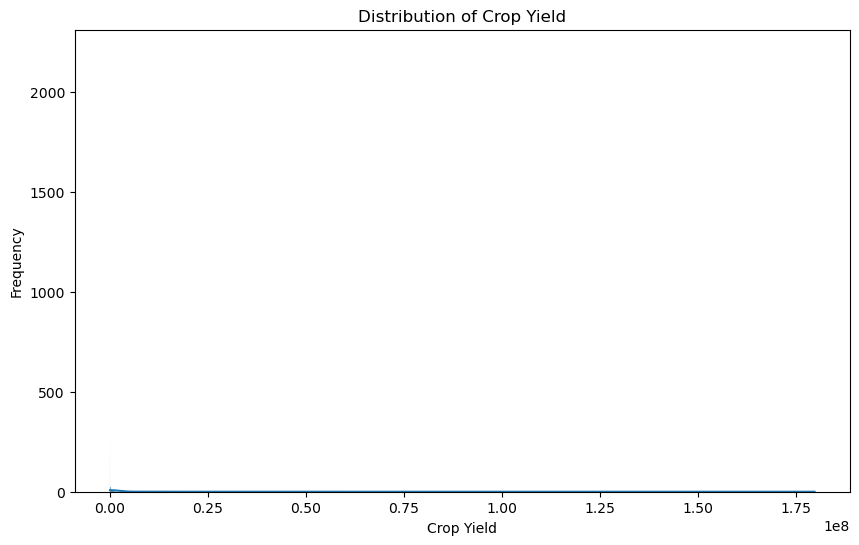

In [10]:
# Visualizing the distribution of crop yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Production'], kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.show()


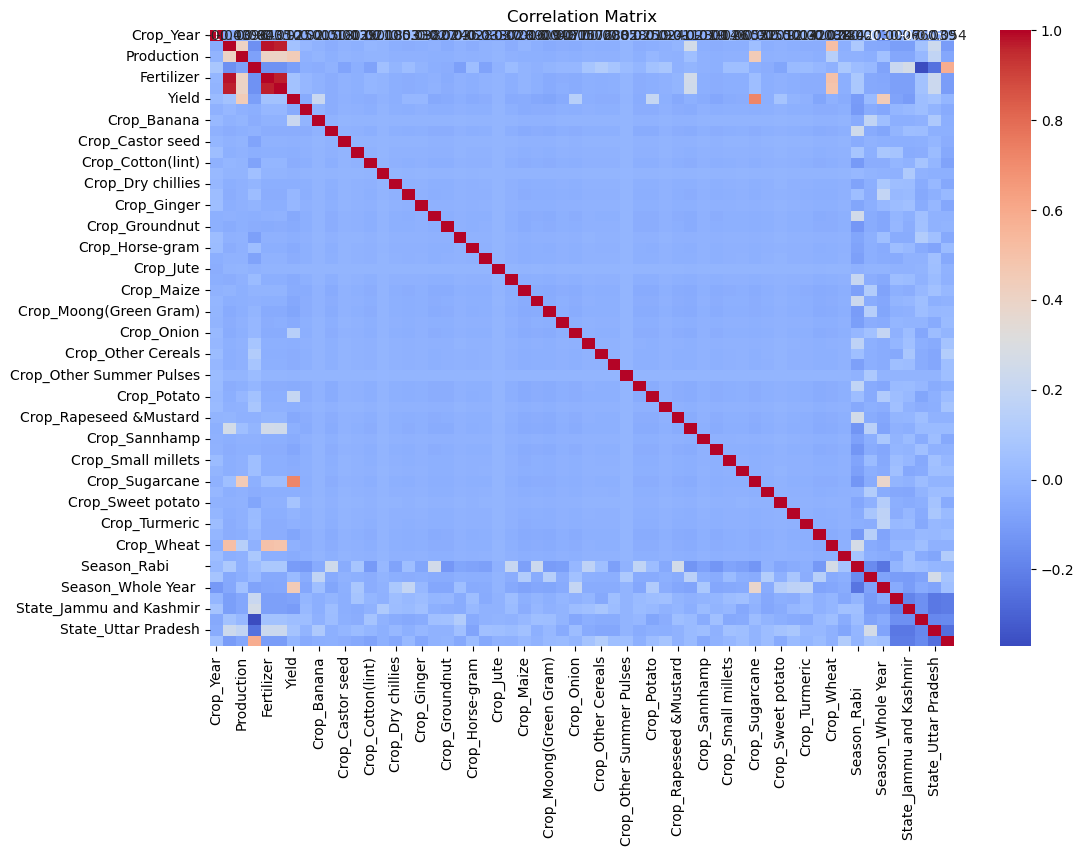

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Separating features (X) and target variable (y)
X = df.drop('Production', axis=1)
y = df['Production']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lr):.2f}")


Linear Regression:
Mean Squared Error: 158522933687844.59
R-squared: 0.42


In [17]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest:
Mean Squared Error: 813052727052.26
R-squared: 1.00


In [18]:
# Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
print("Support Vector Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_svr):.2f}")


Support Vector Regressor:
Mean Squared Error: 279929832713930.72
R-squared: -0.03


In [19]:
# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("K-Nearest Neighbors:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_knn):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_knn):.2f}")


K-Nearest Neighbors:
Mean Squared Error: 2189269436765.42
R-squared: 0.99


In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Final Model with best params
rf_best = grid_search_rf.best_estimator_

# Predictions and evaluation
y_pred_rf_best = rf_best.predict(X_test_scaled)

print(f"Tuned Random Forest - Mean Squared Error: {mean_squared_error(y_test, y_pred_rf_best):.2f}")
print(f"Tuned Random Forest - R-squared: {r2_score(y_test, y_pred_rf_best):.2f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# Plot predictions vs actual for Random Forest (Tuned)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_best, label='Predictions', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Tuned Random Forest: Actual vs Predicted Crop Yield')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.legend()
plt.show()